In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_csv("Tesla.csv")

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [28]:
import datetime as dt
df[['Date']]=df[['Date']].apply(pd.to_datetime)
df['Date']=df['Date'].dt.strftime('%Y')
df['Date']=df['Date'].astype(np.int64)

In [29]:
df.dtypes

Date           int64
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [30]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [31]:
df.describe()

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013.340426,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,1.974395,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,2010.000000,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012.000000,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013.000000,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015.000000,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017.000000,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


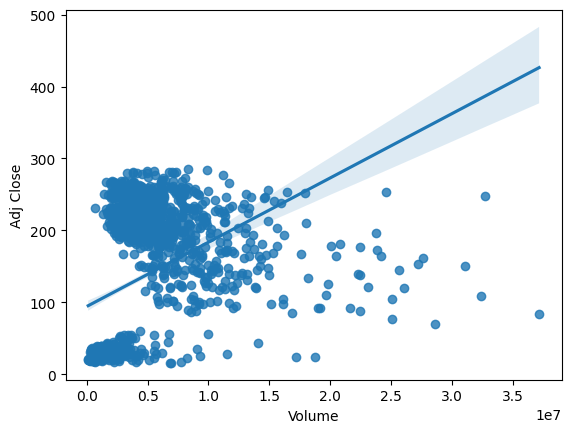

In [32]:
sns.regplot(data=df,x='Volume',y='Adj Close')
plt.show()

In [33]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [34]:
df.duplicated().value_counts()

False    1692
Name: count, dtype: int64

In [35]:
x=df.drop(columns=['Adj Close'])
x.head()

,Date,Open,High,Low,Close,Volume
0,2010,19.000000,25.00,17.540001,23.889999,18766300
1,2010,25.790001,30.42,23.299999,23.830000,17187100
2,2010,25.000000,25.92,20.270000,21.959999,8218800
3,2010,23.000000,23.10,18.709999,19.200001,5139800
4,2010,20.000000,20.00,15.830000,16.110001,6866900


In [36]:
y=df['Adj Close']
y.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Adj Close, dtype: float64

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
std_scl=StandardScaler()


In [39]:
columns=list(df.columns)
columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [40]:
columns.remove('Adj Close')

In [41]:
x=pd.DataFrame(std_scl.fit_transform(x),columns=columns)
x.head()

,Date,Open,High,Low,Close,Volume
0,-1.692373,-1.203215,-1.147419,-1.211450,-1.151173,3.375219
1,-1.692373,-1.131197,-1.090764,-1.149400,-1.151809,3.007510
2,-1.692373,-1.139576,-1.137802,-1.182041,-1.171642,0.919286
3,-1.692373,-1.160789,-1.167280,-1.198846,-1.200915,0.202356
4,-1.692373,-1.192608,-1.199684,-1.229871,-1.233688,0.604503


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1353, 6), (339, 6), (1353,), (339,))

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [48]:
y_pred_lin=lin_reg.predict(X_test)

In [49]:
r2_scr=r2_score(Y_test,y_pred_lin)
print("The r2 Score is: ",r2_scr)

The r2 Score is:  1.0


In [50]:
mae=mean_absolute_error(Y_test,y_pred_lin)
mse=mean_squared_error(Y_test,y_pred_lin)
rmse=np.sqrt(mse)
print("The Mean Absolute Error is: ",mae)
print("The Mean Squared Error is: ",mse)
print("The Root Mean Squared Error is: ",rmse)

The Mean Absolute Error is:  4.2108565077936324e-14
The Mean Squared Error is:  3.0515652999133512e-27
The Root Mean Squared Error is:  5.524097482768883e-14


In [51]:
svr_reg=SVR()
svr_reg.fit(X_train,Y_train)

SVR()

In [52]:
y_pred_svr=svr_reg.predict(X_test)

In [53]:
r2_scr1=r2_score(Y_test,y_pred_svr)
print("The r2 Score is: ",r2_scr1)

The r2 Score is:  0.9880904267625754


In [54]:
mae1=mean_absolute_error(Y_test,y_pred_svr)
mse1=mean_squared_error(Y_test,y_pred_svr)
rmse1=np.sqrt(mse1)
print("The Mean Absolute Error is: ",mae1)
print("The Mean Squared Error is: ",mse1)
print("The Root Mean Squared Error is: ",rmse1)

The Mean Absolute Error is:  5.677118578435177
The Mean Squared Error is:  111.0673246839634
The Root Mean Squared Error is:  10.53884835662623


In [55]:
model_results={'original_value':Y_test,'Linear Regression':y_pred_lin,'SVR':y_pred_svr}
model_results=pd.DataFrame(model_results)
model_results.head()

,original_value,Linear Regression,SVR
989,203.990005,203.990005,204.223560
1637,219.740005,219.740005,221.454795
1217,226.050003,226.050003,231.455796
1175,197.330002,197.330002,203.463324
1373,227.070007,227.070007,224.356300


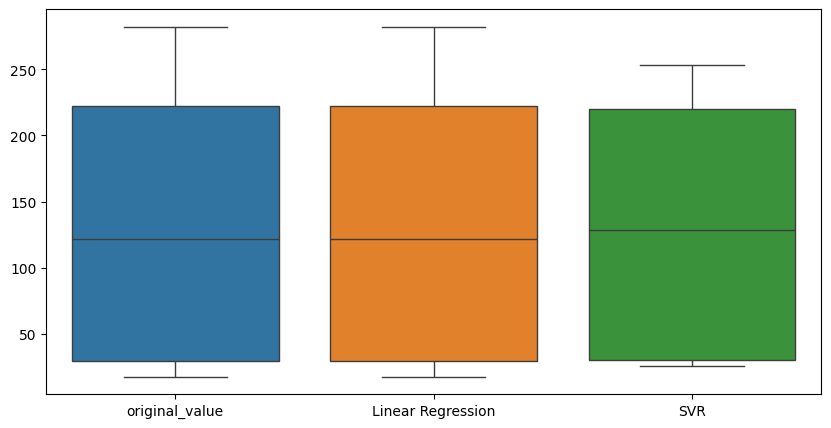

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(data=model_results)
plt.show()

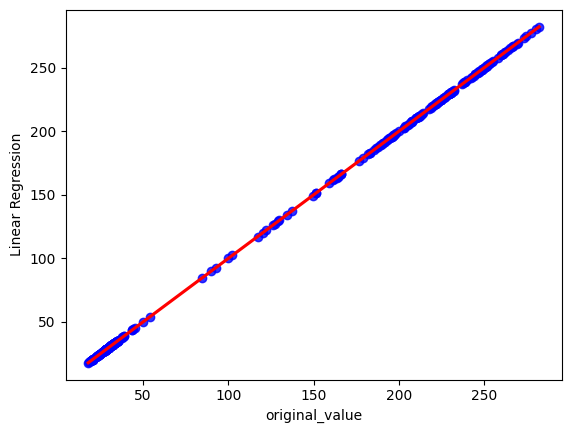

In [57]:
sns.regplot(data=model_results,x='original_value',y='Linear Regression',color='blue',line_kws={'color':'red'})
plt.show()